In [2]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
nb_classes = 10

X = tf.placeholder(tf.float32 ,[None,784])
Y = tf.placeholder(tf.float32 ,[None,nb_classes])

with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([784,256]),name='weight1')
    b1 = tf.Variable(tf.random_normal([256]),name='bias1')
    layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
    
    w1_hist = tf.summary.histogram("weights1",W1)
    b1_hist = tf.summary.histogram("biases1",b1)
    layer1_hist = tf.summary.histogram("layer1",layer1)
    
with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([256,256]),name='weight2')
    b2 = tf.Variable(tf.random_normal([256]),name='bias2')
    layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
    
    w2_hist = tf.summary.histogram("weights2",W2)
    b2_hist = tf.summary.histogram("biases2",b2)
    layer2_hist = tf.summary.histogram("layer2",layer2)

with tf.name_scope("layer3") as scope:
    W3 = tf.Variable(tf.random_normal([256,nb_classes]),name='weight3')
    b3 = tf.Variable(tf.random_normal([nb_classes]),name='bias3')
    hypothesis = tf.matmul(layer2,W3)+b3
    
    w3_hist = tf.summary.histogram("weights3",W3)
    b3_hist = tf.summary.histogram("biases3",b3)
    layer3_hist = tf.summary.histogram("hypothesis",hypothesis)
    


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
cost_sum = tf.summary.scalar("cost",cost)


optimizer =tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

predicted = tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(predicted, dtype =tf.float32))

Instructions for updating:
Use `argmax` instead


Epoch 0001 cost = 140.354405552
Epoch 0002 cost = 37.088988365
Epoch 0003 cost = 23.173860087
Epoch 0004 cost = 15.984471446
Epoch 0005 cost = 11.590448711
Epoch 0006 cost = 8.677443853
Epoch 0007 cost = 6.399526334
Epoch 0008 cost = 4.754232081
Epoch 0009 cost = 3.643999651
Epoch 0010 cost = 2.737366806
Epoch 0011 cost = 1.976962426
Epoch 0012 cost = 1.548579750
Epoch 0013 cost = 1.185400317
Epoch 0014 cost = 0.903083784
Epoch 0015 cost = 0.755736504
Acc 0.9462
Label:  [1]
Prediction:  [1]


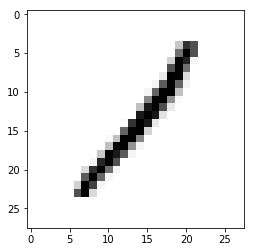

In [5]:
trainin_epochs = 15
batch_size = 100
with tf.Session() as sess:  
    
    merged_summary = tf.summary.merge_all()    
    writer = tf.summary.FileWriter("log/log1")
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())    
    
    for epoch in range(trainin_epochs):
        avg_cost =0
        total_batch  = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c,_ =sess.run([cost,optimizer],feed_dict={X:batch_xs ,Y:batch_ys})
            avg_cost += c / total_batch           
           
            
        print('Epoch','%04d' % ( epoch +1 ),'cost =','{:.9f}'.format(avg_cost))
       
        
    print("Acc" ,accuracy.eval(session=sess,feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()
    
   
            